# Model For Automobile Price Prediction

In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [164]:
# Importing necessary libraies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [165]:
# Importing necessary libraies for reading and plotting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(url, header=None)

In [167]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [168]:
headers = ["symboling", "normalizedlosses", "make", "fueltype","aspiration","numofdoors",
           "bodystyle","drivewheels", "enginelocation", "wheelbase", "length", "width", 
           "height", "curbweight", "enginetype", "numofcylinders", "enginesize", "fuelsystem",
           "bore", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", 
           "highwaympg", "price"]

In [169]:
df.columns = headers
df.head(3)

,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [170]:
df.describe()

,symboling,wheelbase,length,width,height,curbweight,enginesize,compressionratio,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [171]:
df.shape

(205, 26)

In [172]:
df1 = df.replace('?', np.NaN, inplace= True)
df1

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   normalizedlosses  164 non-null    object 
 2   make              205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   numofdoors        203 non-null    object 
 6   bodystyle         205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  length            205 non-null    float64
 11  width             205 non-null    float64
 12  height            205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  numofcylinders    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [174]:
df.columns

Index(['symboling', 'normalizedlosses', 'make', 'fueltype', 'aspiration',
       'numofdoors', 'bodystyle', 'drivewheels', 'enginelocation', 'wheelbase',
       'length', 'width', 'height', 'curbweight', 'enginetype',
       'numofcylinders', 'enginesize', 'fuelsystem', 'bore', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [175]:
df.isnull().sum()

symboling            0
normalizedlosses    41
make                 0
fueltype             0
aspiration           0
numofdoors           2
bodystyle            0
drivewheels          0
enginelocation       0
wheelbase            0
length               0
width                0
height               0
curbweight           0
enginetype           0
numofcylinders       0
enginesize           0
fuelsystem           0
bore                 4
stroke               4
compressionratio     0
horsepower           2
peakrpm              2
citympg              0
highwaympg           0
price                4
dtype: int64

In [176]:
# Columns in "Automobile Dataset"
d = ['normalizedlosses','numofdoors','bore','stroke','horsepower','peakrpm']
print('Unique Elements in Each Column')

# Unique Elements in each column
for i in d:
    x = df[i].unique()
    print(i, '=' ,x)
    print(' ')

Unique Elements in Each Column
normalizedlosses = [nan '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
 
numofdoors = ['two' 'four' nan]
 
bore = ['3.47' '2.68' '3.19' '3.13' '3.50' '3.31' '3.62' '2.91' '3.03' '2.97'
 '3.34' '3.60' '2.92' '3.15' '3.43' '3.63' '3.54' '3.08' nan '3.39' '3.76'
 '3.58' '3.46' '3.80' '3.78' '3.17' '3.35' '3.59' '2.99' '3.33' '3.70'
 '3.61' '3.94' '3.74' '2.54' '3.05' '3.27' '3.24' '3.01']
 
stroke = ['2.68' '3.47' '3.40' '2.80' '3.19' '3.39' '3.03' '3.11' '3.23' '3.46'
 '3.90' '3.41' '3.07' '3.58' '4.17' '2.76' '3.15' nan '3.16' '3.64' '3.10'
 '3.35' '3.12' '3.86' '3.29' '3.27' '3.52' '2.19' '3.21' '2.90' '2.07'
 '2.36' '2.64' '3.08' '3.50' '3.54' '2.87']
 
horsepower = ['111' '154' '102' '115' '110' '140' '160' '

In [177]:
normloss = df["normalizedlosses"].astype("float").mean(axis=0)
# print("Average of normalizedlosses:", normloss)
df["normalizedlosses"].replace(np.nan, normloss, inplace=True)

In [178]:
avg_bore=df['bore'].astype('float').mean(axis=0)
# print("Average of bore:", avg_bore)
df["bore"].replace(np.nan, avg_bore, inplace=True)

In [179]:
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
# print("Average of stroke:", avg_stroke)
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

In [180]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
# print("Average horsepower:", avg_horsepower)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [181]:
avg_peakrpm=df['peakrpm'].astype('float').mean(axis=0)
# print("Average peak rpm:", avg_peakrpm)
df['peakrpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [182]:
# df['numofdoors'].value_counts()
df['numofdoors'].value_counts().idxmax()       
# .max() will give index and .idxmax() value
df["numofdoors"].replace(np.nan, "four", inplace=True)

In [183]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [184]:
df.isnull().sum()

symboling           0
normalizedlosses    0
make                0
fueltype            0
aspiration          0
numofdoors          0
bodystyle           0
drivewheels         0
enginelocation      0
wheelbase           0
length              0
width               0
height              0
curbweight          0
enginetype          0
numofcylinders      0
enginesize          0
fuelsystem          0
bore                0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [185]:
# Columns with incorrect dtype in "Automobile Dataset"
d = ['normalizedlosses','bore','stroke','horsepower','peakrpm','price']

# Change Dtype of the columns
for i in d:
    df[i] = df[i].astype('float64')

In [186]:
df.dtypes

symboling             int64
normalizedlosses    float64
make                 object
fueltype             object
aspiration           object
numofdoors           object
bodystyle            object
drivewheels          object
enginelocation       object
wheelbase           float64
length              float64
width               float64
height              float64
curbweight            int64
enginetype           object
numofcylinders       object
enginesize            int64
fuelsystem           object
bore                float64
stroke              float64
compressionratio    float64
horsepower          float64
peakrpm             float64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [187]:
## Full heatmap
# plt.subplots(figsize=(20,15))
# sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, annot_kws={'size': 15})
# ( triu is upper triangle and tril is lower triangle)

<AxesSubplot:>

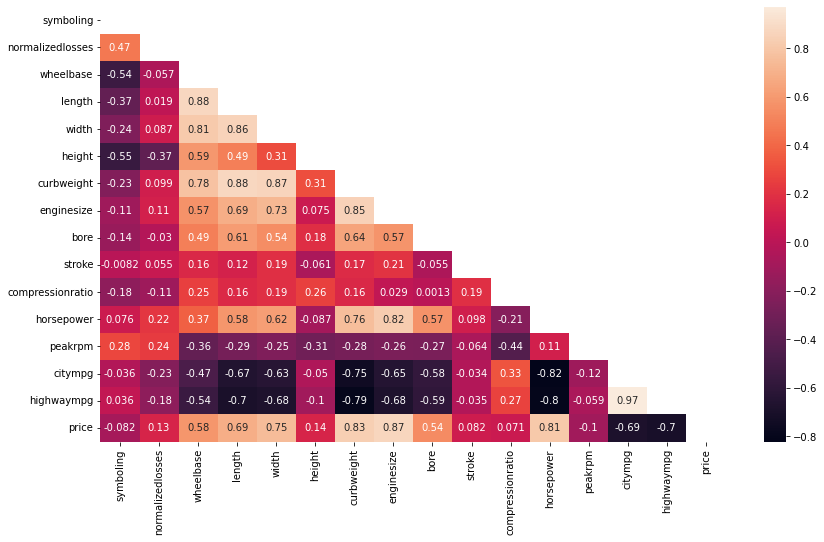

In [188]:
# Correlation
corr= df.corr()

# Getting the Upper Triangle of the co-relation matrix  
matrix = np.triu(corr)

# Size 
plt.subplots(figsize=(14,8))

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix)

<!-- **Checking the significance of the factors: using p-value test** -->

**Let's view the relationship of these factors with 'price'**

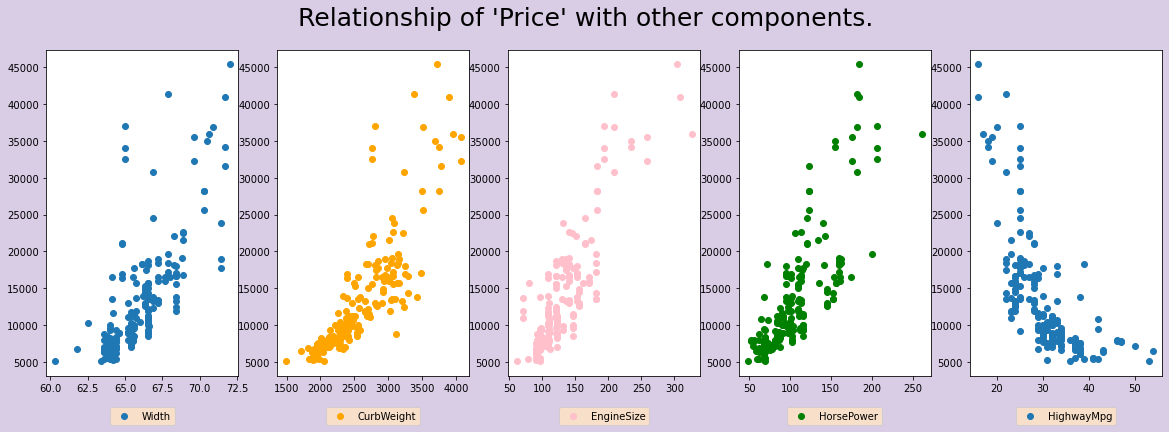

In [189]:
fig = plt.figure(figsize=(20,6),facecolor=(0.850, 0.800, 0.898))
fig.suptitle("Relationship of 'Price' with other components.", fontsize=25)
plt.subplot(1,5,1)
plt.scatter(df['width'], df['price'])
plt.legend(["Width"], facecolor='bisque',
           loc='upper center', bbox_to_anchor=(0.5, -0.08))

plt.subplot(1,5,2)
plt.scatter(df['curbweight'], df['price'], color='orange')
plt.legend(["CurbWeight"], facecolor='bisque', 
           loc='upper center', bbox_to_anchor=(0.5, -0.08))
           
plt.subplot(1,5,3)
plt.scatter(df['enginesize'], df['price'], color='pink')
plt.legend(["EngineSize"], facecolor='bisque', 
           loc='upper center', bbox_to_anchor=(0.5, -0.08))

plt.subplot(1,5,4)
plt.scatter(df['horsepower'], df['price'], color='green')
plt.legend(["HorsePower"], facecolor='bisque', 
           loc='upper center', bbox_to_anchor=(0.5, -0.08))

plt.subplot(1,5,5)
plt.scatter(df['highwaympg'], df['price'])
plt.legend(['HighwayMpg'], facecolor='bisque', 
           loc='upper center', bbox_to_anchor=(0.5, -0.08))


**Case 1:**
    
**-1 <= r <= -0.5** and **0.5 <= r <= 1**

In [190]:
z1 = df[['wheelbase','length','width','curbweight',
    'enginesize','bore','horsepower','citympg','highwaympg']]
y = df['price']
lm1 = LinearRegression()
lm1.fit(z1, y)

LinearRegression()

In [191]:
z1 = sm.add_constant(z1)
model1 = sm.OLS(df['price'], z1).fit()

#display adjusted R-squared
print(model1.rsquared_adj)

0.8105211859038669


**Case 2:**
    
**-1 <= r <= -0.65** and **0.65 <= r <= 1**

In [192]:
z2 = df[['length','width','curbweight','enginesize',
         'horsepower','citympg','highwaympg']]
y = df['price']
lm2 = LinearRegression()
lm2.fit(z2,y)

LinearRegression()

In [193]:
z2 = sm.add_constant(z2)
model2 = sm.OLS(y, z2).fit()

#display adjusted R-squared
print(model2.rsquared_adj)

0.8106692937449689


**Case 3:**
    
**-1 <= r <= -0.7** and **0.7 <= r <= 1**

In [194]:
z3 = df[['width','curbweight','enginesize'
         ,'horsepower','highwaympg']]
y = df['price']
lm3 = LinearRegression()
lm3.fit(z3,y)

LinearRegression()

In [195]:
z3= sm.add_constant(z3)
model3 = sm.OLS(y,z3).fit()

#display adjusted R-squared
print(model3.rsquared_adj)

0.8116250089147844


**Case 4:**
    
**-1 <= r <= -0.8** and **0.8 <= r <= 1**

In [196]:
z4 = df[['curbweight','enginesize','horsepower']]
y = df['price']
lm4 = LinearRegression()
lm4.fit(z4, y)

LinearRegression()

In [197]:
z4= sm.add_constant(z4)
model4 = sm.OLS(y, z4).fit()

#display adjusted R-squared
print(model4.rsquared_adj)

0.8062196745466127


In [198]:
# x = df['citympg']
# f = np.polyfit(x, y, 3)
# p = np.poly1d(f)
# print(p)

In [199]:
# def PlotPolly(model, independent_variable, dependent_variabble, Name):
#     x_new = np.linspace(15, 55, 100)
#     y_new = model(x_new)

#     plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
#     plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
#     ax = plt.gca()
#     ax.set_facecolor((0.898, 0.898, 0.898))
#     fig = plt.gcf()
#     plt.xlabel(Name)
#     plt.ylabel('Price of Cars')

#     plt.show()
#     plt.close()

In [200]:
# PlotPolly(p, x, y, 'highway-mpg')

**Price Prediction using factors whose correlation cofficient is either:**

**-1 <= r <= -0.7** and **0.7 <= r <= 1**

In [201]:
z3 = df[['width','curbweight','enginesize','horsepower','highwaympg']]

lm = LinearRegression()
lm.fit(z3, df['price'])

LinearRegression()

In [202]:
Yhat = lm.predict(z3)

In [203]:
lm.intercept_

-52880.0422714663

In [204]:
lm.coef_

array([639.65214095,   2.45568102,  78.84796991,  59.41789604,
        49.44085428])

**Estimated Model is:**

Price = -52880.042  + (639.652)* width + (2.455)* curbweight+ (78.847)* enginesize + 
(59.41)* horsepower + (49.440)* highwaympg

**Comparing the Actual Values with fitted data**

In [45]:
# plt.figure(figsize=(6, 4), dpi=100)

# ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
# sns.distplot(Yhat2, hist=False, color="b", label="Fitted Values" , ax=ax1)


# plt.title('Actual vs Fitted Values for Price')
# plt.xlabel('Price (in dollars)')

# plt.show()

And to calculate the price we can enter the values of the features below:

In [54]:
# # Calculate the predicted price

# w = float(input("Enter width of your car: "))
# cb = float(input("Enter curbweight of your car: "))
# es = float(input("Enter enginesize of your car: "))
# hp = float(input("Enter horsepower of your car: "))
# hm = float(input("Enter highwaympg of your car: "))

# Price = -52880.042  + (639.652)* w + (2.455)* cb + (78.847)* es + (59.41)* hp + (49.440)* hm

# print("The predicted price for your model is: ",Price)

In [ ]:
# d1 = ['wheelbase','length','width','curbweight','enginesize','bore','horsepower','citympg','highwaympg']

# for i in d1:
#     _, p_value = st.pearsonr(df[i], df['price'])
#     print("P-value for X =",i,", Y = Price is ", p_value)